In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn import svm
from sklearn.model_selection import train_test_split

In [35]:
# Load data 

data = pd.read_csv('datascraping/clean/final_financial_data.csv')
data

,Year,RGDP,Unemployment,Fedfunds,S&P_datapoint_1,S&P_datapoint_2,S&P_datapoint_3,S&P_datapoint_4,S&P_datapoint_5,S&P_datapoint_6,...,S&P_datapoint_75,S&P_datapoint_76,S&P_datapoint_77,S&P_datapoint_78,S&P_datapoint_79,S&P_datapoint_80,S&P_datapoint_81,S&P_datapoint_82,S&P_datapoint_83,label
0,1984,7722.998667,9.344444,9.231111,164.039993,166.779999,168.809998,169.279999,168.899994,167.949997,...,158.970001,157.899994,158.020004,156.800003,158.070007,158.649994,160.300003,159.889999,160.050003,1.0
1,1985,8248.778000,7.388889,10.404444,165.369995,164.570007,163.679993,164.240005,163.990005,165.179993,...,180.839996,181.110001,180.699997,181.880005,182.259995,183.429993,182.179993,180.630005,179.830002,0.0
2,1986,8582.398333,7.177778,7.975556,209.589996,210.880005,210.649994,213.800003,207.970001,206.110001,...,242.380005,244.740005,242.419998,241.750000,242.020004,242.289993,243.080002,240.509995,235.520004,1.0
3,1987,8860.439333,6.988889,6.464444,246.449997,252.190002,252.779999,255.330002,257.279999,258.730011,...,286.089996,293.070007,287.190002,286.820007,281.519989,281.829987,282.510010,284.570007,288.359985,0.0
4,1988,9188.204000,6.033333,6.803333,255.940002,258.630005,258.890015,261.070007,243.399994,247.490005,...,257.920013,256.130005,256.420013,260.140015,262.510010,263.929993,263.799988,262.609985,261.329987,1.0
5,1989,9570.068333,5.422222,7.870000,275.309998,279.429993,280.010010,280.670013,280.980011,280.380005,...,307.149994,306.190002,309.609985,308.690002,306.750000,306.929993,309.579987,309.640015,293.899994,0.0
6,1990,9901.429333,5.277778,9.141111,359.690002,358.760010,355.670013,352.200012,353.790009,349.619995,...,340.720001,338.089996,335.119995,331.049988,330.359985,332.029999,332.920013,329.109985,330.799988,0.0
7,1991,10057.709333,5.722222,8.048889,326.450012,321.910004,321.000000,315.440002,314.899994,311.489990,...,388.459991,384.200012,380.950012,381.760010,382.760010,379.250000,379.019989,373.660004,375.339996,1.0
8,1992,10075.011333,6.933333,5.441111,417.260010,419.339996,417.959991,417.399994,418.100006,417.609985,...,416.040009,410.179993,410.260010,409.809998,411.600006,409.019989,408.450012,409.109985,412.019989,0.0
9,1993,10451.916667,7.533333,3.354444,435.380005,434.339996,434.519989,430.730011,429.049988,430.950012,...,445.100006,443.630005,439.459991,437.029999,433.540009,438.010010,438.019989,438.890015,440.190002,1.0


In [36]:
data = data.drop('Year', axis=1)

# remove last row
data = data.iloc[:-1]
data

,RGDP,Unemployment,Fedfunds,S&P_datapoint_1,S&P_datapoint_2,S&P_datapoint_3,S&P_datapoint_4,S&P_datapoint_5,S&P_datapoint_6,S&P_datapoint_7,...,S&P_datapoint_75,S&P_datapoint_76,S&P_datapoint_77,S&P_datapoint_78,S&P_datapoint_79,S&P_datapoint_80,S&P_datapoint_81,S&P_datapoint_82,S&P_datapoint_83,label
0,7722.998667,9.344444,9.231111,164.039993,166.779999,168.809998,169.279999,168.899994,167.949997,167.800003,...,158.970001,157.899994,158.020004,156.800003,158.070007,158.649994,160.300003,159.889999,160.050003,1.0
1,8248.778000,7.388889,10.404444,165.369995,164.570007,163.679993,164.240005,163.990005,165.179993,168.309998,...,180.839996,181.110001,180.699997,181.880005,182.259995,183.429993,182.179993,180.630005,179.830002,0.0
2,8582.398333,7.177778,7.975556,209.589996,210.880005,210.649994,213.800003,207.970001,206.110001,205.960007,...,242.380005,244.740005,242.419998,241.750000,242.020004,242.289993,243.080002,240.509995,235.520004,1.0
3,8860.439333,6.988889,6.464444,246.449997,252.190002,252.779999,255.330002,257.279999,258.730011,260.299988,...,286.089996,293.070007,287.190002,286.820007,281.519989,281.829987,282.510010,284.570007,288.359985,0.0
4,9188.204000,6.033333,6.803333,255.940002,258.630005,258.890015,261.070007,243.399994,247.490005,245.419998,...,257.920013,256.130005,256.420013,260.140015,262.510010,263.929993,263.799988,262.609985,261.329987,1.0
5,9570.068333,5.422222,7.870000,275.309998,279.429993,280.010010,280.670013,280.980011,280.380005,282.010010,...,307.149994,306.190002,309.609985,308.690002,306.750000,306.929993,309.579987,309.640015,293.899994,0.0
6,9901.429333,5.277778,9.141111,359.690002,358.760010,355.670013,352.200012,353.790009,349.619995,347.309998,...,340.720001,338.089996,335.119995,331.049988,330.359985,332.029999,332.920013,329.109985,330.799988,0.0
7,10057.709333,5.722222,8.048889,326.450012,321.910004,321.000000,315.440002,314.899994,311.489990,314.529999,...,388.459991,384.200012,380.950012,381.760010,382.760010,379.250000,379.019989,373.660004,375.339996,1.0
8,10075.011333,6.933333,5.441111,417.260010,419.339996,417.959991,417.399994,418.100006,417.609985,415.100006,...,416.040009,410.179993,410.260010,409.809998,411.600006,409.019989,408.450012,409.109985,412.019989,0.0
9,10451.916667,7.533333,3.354444,435.380005,434.339996,434.519989,430.730011,429.049988,430.950012,431.040009,...,445.100006,443.630005,439.459991,437.029999,433.540009,438.010010,438.019989,438.890015,440.190002,1.0


                      RGDP  Unemployment   Fedfunds  S&P_datapoint_1  \
RGDP              1.000000      -0.236561 -0.826600         0.893003   
Unemployment     -0.236561       1.000000 -0.107038        -0.280686   
Fedfunds         -0.826600      -0.107038  1.000000        -0.637873   
S&P_datapoint_1   0.893003      -0.280686 -0.637873         1.000000   
S&P_datapoint_2   0.891711      -0.279304 -0.636172         0.999828   
...                    ...            ...       ...              ...   
S&P_datapoint_80  0.898697      -0.248979 -0.646030         0.987970   
S&P_datapoint_81  0.896222      -0.245907 -0.643700         0.988783   
S&P_datapoint_82  0.899948      -0.246008 -0.648767         0.988222   
S&P_datapoint_83  0.895829      -0.264507 -0.641891         0.995172   
label            -0.079789       0.350467 -0.120985        -0.192743   

                  S&P_datapoint_2  S&P_datapoint_3  S&P_datapoint_4  \
RGDP                     0.891711         0.894396         0.892

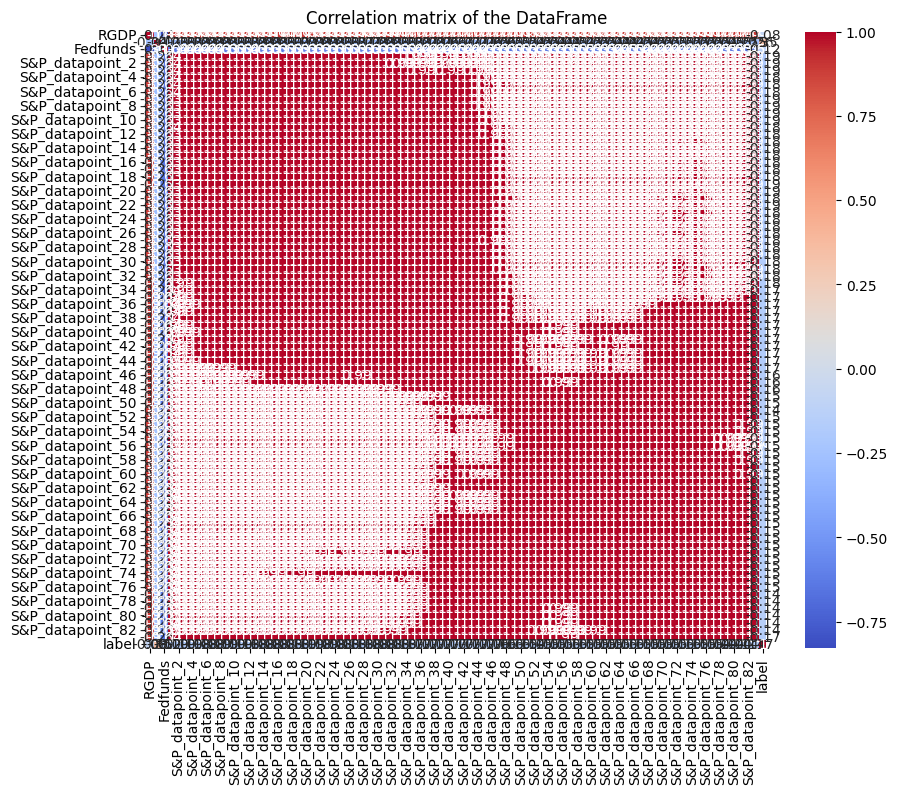

In [37]:

correlation_matrix = data.corr()

print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your DataFrame
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix of the DataFrame')
plt.show()


In [39]:
# train test split the data
X = data.drop('label', axis=1)  
Y = data['label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [5]:
# Create a SVM Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

clf.fit(X_train, Y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

acc = metrics.accuracy_score(Y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.25


In [6]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

acc = metrics.accuracy_score(Y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.125


In [7]:
from xgboost import XGBClassifier

clf = XGBClassifier()
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

acc = metrics.accuracy_score(Y_test, y_pred)
print(acc)

ModuleNotFoundError: No module named 'xgboost'

In [40]:
from sklearn.neural_network import MLPClassifier

lst = []
clflst = []
for i in range(0,1000):
    clf = MLPClassifier()
    clflst.append(clf)


    clf.fit(X_train, Y_train)

    y_pred = clf.predict(X_test)

    acc = metrics.accuracy_score(Y_test, y_pred)
    lst.append(acc)
    #print(acc)

clf_dict = dict(zip(lst, clflst))

In [41]:
print(np.mean(lst))
print(max(lst))



0.50575
1.0


In [42]:
best = clf_dict[1.0]

In [43]:
from joblib import dump


# Save the classifier
dump(best, 'best_classifier.joblib')


['best_classifier.joblib']

In [44]:
import joblib

# Load the joblib file
loaded_model = joblib.load('classifier.joblib')

# Use the loaded model
predictions = loaded_model.predict(X_test)


In [52]:
d2 = pd.read_csv('datascraping/clean/final_financial_data.csv')


last_row = d2.tail(1)
last_row
last_row = last_row.drop('label', axis=1)
last_row = last_row.drop('Year',axis=1)
last_row

predictions = loaded_model.predict(last_row)

In [53]:
predictions

array([0.])